### T_Level Plots

#### Infiltration Rate vs. Time

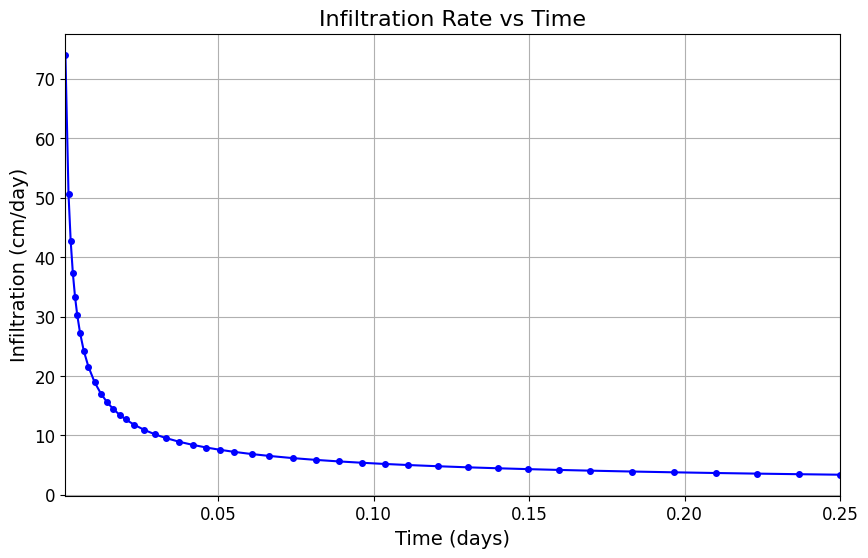

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to read Excel and plot (sum_Infil / Time) vs Time with axis range and font size settings
def plot_infil_divided_by_time_vs_time(excel_file_path, time_min=0.0010, time_max=0.2500, x_range=None, y_range=None):
    # Read the Excel file
    df = pd.read_excel(excel_file_path)

    # Convert 'Time' column to numeric (in case it's stored as string)
    df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

    # Filter data for the given range in the 'Time' column
    filtered_df = df[(df['Time'] >= time_min) & (df['Time'] <= time_max)]

    # Avoid division by zero (even though the time range doesn't have zero)
    filtered_df = filtered_df[filtered_df['Time'] != 0]

    # Calculate sum_Infil / Time
    filtered_df['Infil_per_Time'] = filtered_df['sum_Infil'].astype(float) / filtered_df['Time'].astype(float)

    # Plot 'Infil_per_Time' vs 'Time'
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_df['Time'], filtered_df['Infil_per_Time'], marker='o', markersize=4, linestyle='-', color='b')

    # Set x-axis and y-axis ranges if provided
    if x_range:
        plt.xlim(x_range)
    if y_range:
        plt.ylim(y_range)

    # Add labels and title with font size
    plt.xlabel('Time (days)', fontsize=14)
    plt.ylabel('Infiltration (cm/day)', fontsize=14)
    plt.title('Infiltration Rate vs Time', fontsize=16)

    # Set font size for ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Show grid
    plt.grid(True)

    # Show the plot
    plt.show()

# Example usage:
excel_file_path = 'C:/Users/marzi/OneDrive - University of New Mexico/CE 549/Homework/HW 10/T_Level_output_P4.xlsx'  # Replace with your actual file path

# Define axis ranges (optional, set None if you don't want to set them)
x_axis_range = (0.0010, 0.2500)  # X-axis range
y_axis_range = None  # Y-axis range (set to None if you want to auto-scale)

plot_infil_divided_by_time_vs_time(excel_file_path, x_range=x_axis_range, y_range=y_axis_range)


#### Cumulative Infiltration vs. Time

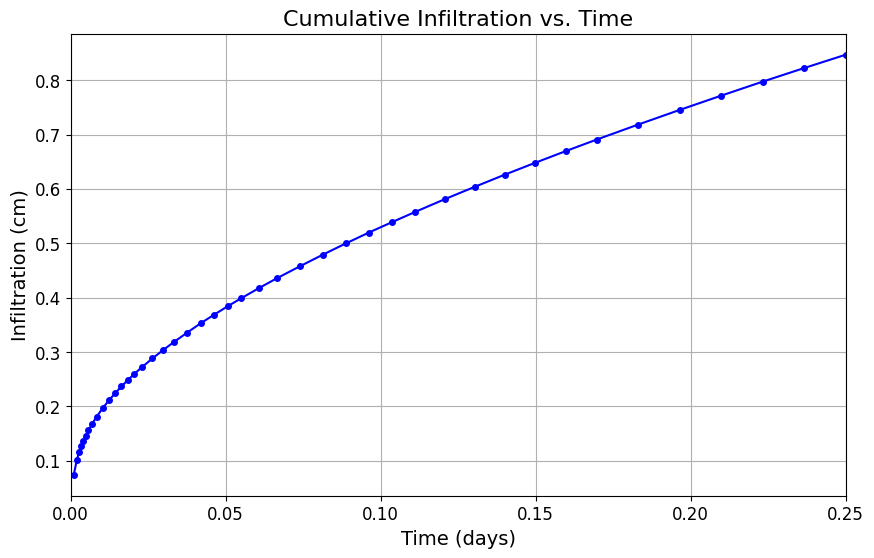

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to read Excel and plot sum_Infil vs Time with axis range and font size settings
def plot_sum_infil_vs_time(excel_file_path, time_min=0.0010, time_max=0.2500, x_range=None, y_range=None):
    # Read the Excel file
    df = pd.read_excel(excel_file_path)

    # Convert 'Time' column to numeric (in case it's stored as string)
    df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

    # Filter data for the given range in the 'Time' column
    filtered_df = df[(df['Time'] >= time_min) & (df['Time'] <= time_max)]

    # Plot 'sum_Infil' vs 'Time'
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_df['Time'], filtered_df['sum_Infil'], marker='o', markersize=4, linestyle='-', color='b')

    # Set x-axis and y-axis ranges if provided
    if x_range:
        plt.xlim(x_range)
    if y_range:
        plt.ylim(y_range)

    # Add labels and title with font size
    plt.xlabel('Time (days)', fontsize=14)
    plt.ylabel('Infiltration (cm)', fontsize=14)
    plt.title('Cumulative Infiltration vs. Time', fontsize=16)

    # Set font size for ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Show grid
    plt.grid(True)

    # Show the plot
    plt.show()

# Example usage:
excel_file_path = 'C:/Users/marzi/OneDrive - University of New Mexico/CE 549/Homework/HW 10/T_Level_output_P4.xlsx' # Replace with your actual file path

# Define axis ranges (optional, set None if you don't want to set them)
x_axis_range = (0.0000, 0.2500)  # X-axis range
y_axis_range = None  # Y-axis range (set to None if you want to auto-scale)

plot_sum_infil_vs_time(excel_file_path, x_range=x_axis_range, y_range=y_axis_range)


### Nod_Infil & T_Level plots

#### Infiltration rate vs Saturated Hydraulic Conductivity

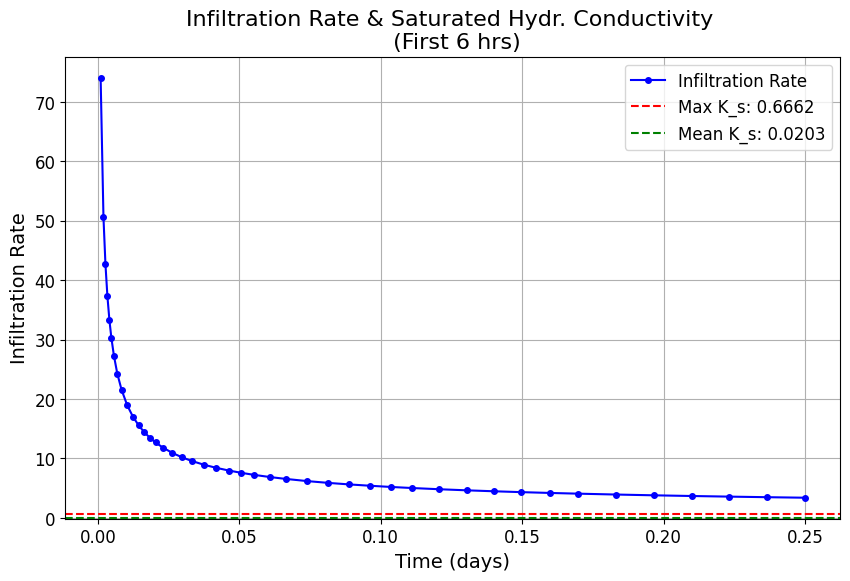

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_infiltration_rate_with_k_stats(t_level_excel, nod_inf_excel, time_min=0.0010, time_max=0.2500):
    # Read the T_Level Excel file
    t_level_df = pd.read_excel(t_level_excel)

    # Convert 'Time' column to numeric (in case it's stored as string)
    t_level_df['Time'] = pd.to_numeric(t_level_df['Time'], errors='coerce')

    # Filter data for the given range in the 'Time' column
    filtered_t_level_df = t_level_df[(t_level_df['Time'] >= time_min) & (t_level_df['Time'] <= time_max)]

    # Avoid division by zero
    filtered_t_level_df = filtered_t_level_df[filtered_t_level_df['Time'] != 0]

    # Calculate sum_Infil / Time (Infiltration rate)
    filtered_t_level_df['Infiltration_rate'] = filtered_t_level_df['sum_Infil'].astype(float) / filtered_t_level_df['Time'].astype(float)

    # Read the 'Time_0.2500' sheet from the Nod_Inf Excel file
    nod_inf_df = pd.read_excel(nod_inf_excel, sheet_name='Time_0.2500')

    # Convert the 'K' column to numeric (in case it's stored as string)
    nod_inf_df['K'] = pd.to_numeric(nod_inf_df['K'], errors='coerce')

    # Calculate mean, max, and min of the 'K' values
    k_mean = nod_inf_df['K'].mean()
    k_max = nod_inf_df['K'].max()
    k_min = nod_inf_df['K'].min()

    # Plot Infiltration Rate vs Time
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_t_level_df['Time'], filtered_t_level_df['Infiltration_rate'], marker='o', markersize=4, linestyle='-', color='b', label='Infiltration Rate')

    # Add horizontal lines for the mean, max, and min of 'K'
    plt.axhline(y=k_max, color='r', linestyle='--', label=f'Max K_s: {k_max:.4f}')
    plt.axhline(y=k_mean, color='g', linestyle='--', label=f'Mean K_s: {k_mean:.4f}')
    #plt.axhline(y=k_min, color='purple', linestyle='--', label=f'Min K_s: {k_min:.4f}')

    # Add labels, title, and legend
    plt.xlabel('Time (days)', fontsize=14)
    plt.ylabel('Infiltration Rate', fontsize=14)
    plt.title('Infiltration Rate & Saturated Hydr. Conductivity \n (First 6 hrs)', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)

    # Show grid
    plt.grid(True)

    # Show the plot
    plt.show()

# Example usage:
t_level_excel = 'C:/Users/marzi/OneDrive - University of New Mexico/CE 549/Homework/HW 10/T_Level_output_P4.xlsx'  # Replace with your T_Level Excel file path
nod_inf_excel = 'C:/Users/marzi/OneDrive - University of New Mexico/CE 549/Homework/HW 10/Nod_Inf_output_P4.xlsx'  # Replace with your Nod_Inf Excel file path

plot_infiltration_rate_with_k_stats(t_level_excel, nod_inf_excel)


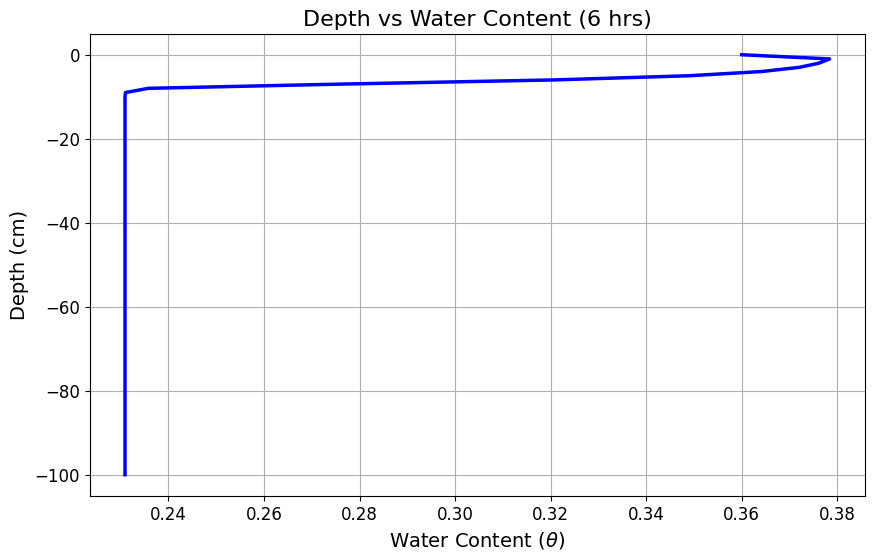

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_depth_vs_moisture(nod_inf_excel, line_width=2.0):
    """
    Function to plot Depth vs Moisture from the 'Time_0.2500' sheet in the Nod_Inf_output Excel file.
    
    Parameters:
    nod_inf_excel (str): Path to the Nod_Inf_output Excel file.
    line_width (float): Line width for the plot (default is 2.0).
    """
    # Read the 'Time_0.2500' sheet from the Nod_Inf Excel file
    nod_inf_df = pd.read_excel(nod_inf_excel, sheet_name='Time_0.2500')

    # Convert the 'Depth' and 'Moisture' columns to numeric (in case they're stored as strings)
    nod_inf_df['Depth'] = pd.to_numeric(nod_inf_df['Depth'], errors='coerce')
    nod_inf_df['Moisture'] = pd.to_numeric(nod_inf_df['Moisture'], errors='coerce')

    # Plot Depth vs Moisture
    # Add marker='o' for dot markers
    plt.figure(figsize=(10, 6))
    plt.plot(nod_inf_df['Moisture'], nod_inf_df['Depth'], linestyle='-', color='b', linewidth=2.5)

    # Add labels and title
    plt.xlabel(r'Water Content ($\theta$)', fontsize=14)
    plt.ylabel('Depth (cm)', fontsize=14)
    plt.title('Depth vs Water Content (6 hrs)', fontsize=16)

    # Set font size for ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Ensure depth increases upwards by removing any inversion
    # No plt.gca().invert_yaxis() call here, depth will increase upwards naturally.

    # Show grid
    plt.grid(True)

    # Show the plot
    plt.show()

# Example usage:
nod_inf_excel = 'C:/Users/marzi/OneDrive - University of New Mexico/CE 549/Homework/HW 10/Nod_Inf_output_P4.xlsx'  # Replace with your actual file path
plot_depth_vs_moisture(nod_inf_excel)  # Adjust the line width as needed


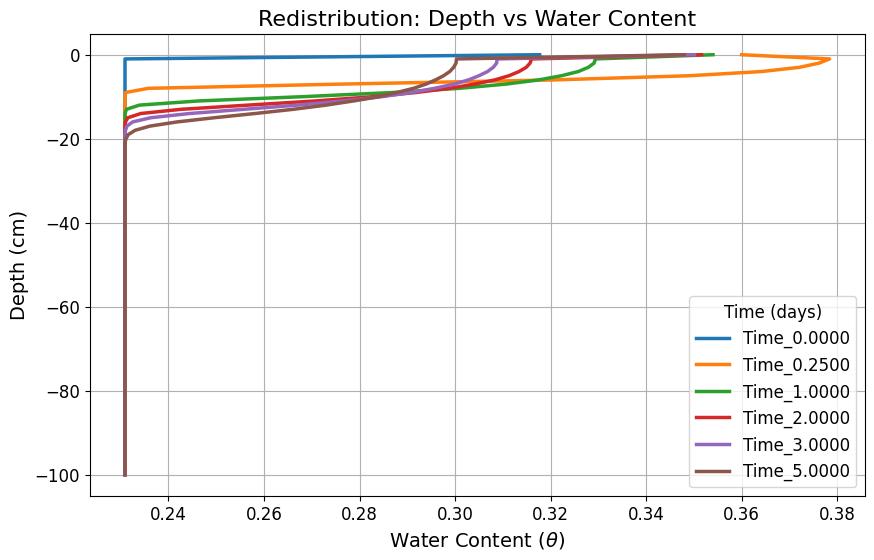

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_moisture_vs_depth_for_all_sheets(nod_inf_excel):
    """
    Function to plot Moisture vs Depth for each sheet in the Nod_Inf_output Excel file.
    There will be 6 lines for different time values (0, 0.25, 1, 2, 3, 5).
    
    Parameters:
    nod_inf_excel (str): Path to the Nod_Inf_output Excel file.
    """
    # Define the sheet names corresponding to each time
    sheet_names = ['Time_0.0000', 'Time_0.2500', 'Time_1.0000', 'Time_2.0000', 'Time_3.0000', 'Time_5.0000']
    
    # Set up the plot
    plt.figure(figsize=(10, 6))
    
    # Loop through each sheet, extract Moisture and Depth, and plot them
    for sheet in sheet_names:
        # Read the sheet
        nod_inf_df = pd.read_excel(nod_inf_excel, sheet_name=sheet)
        
        # Convert 'Depth' and 'Moisture' to numeric (if necessary)
        nod_inf_df['Depth'] = pd.to_numeric(nod_inf_df['Depth'], errors='coerce')
        nod_inf_df['Moisture'] = pd.to_numeric(nod_inf_df['Moisture'], errors='coerce')
        
        # Plot Moisture vs Depth
        plt.plot(nod_inf_df['Moisture'], nod_inf_df['Depth'], linewidth=2.5, label=sheet)
    
    # Add labels, title, and legend
    plt.xlabel(r'Water Content ($\theta$)', fontsize=14)
    plt.ylabel('Depth (cm)', fontsize=14)
    plt.title('Redistribution: Depth vs Water Content', fontsize=16)
    
    # Set font size for ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add legend to distinguish between the lines
    plt.legend(title="Time (days)", fontsize=12, title_fontsize=12)

    # Show grid
    plt.grid(True)

    # Show the plot
    plt.show()

# Example usage:
nod_inf_excel = 'C:/Users/marzi/OneDrive - University of New Mexico/CE 549/Homework/HW 10/Nod_Inf_output_P4.xlsx'  # Replace with your actual file path
plot_moisture_vs_depth_for_all_sheets(nod_inf_excel)


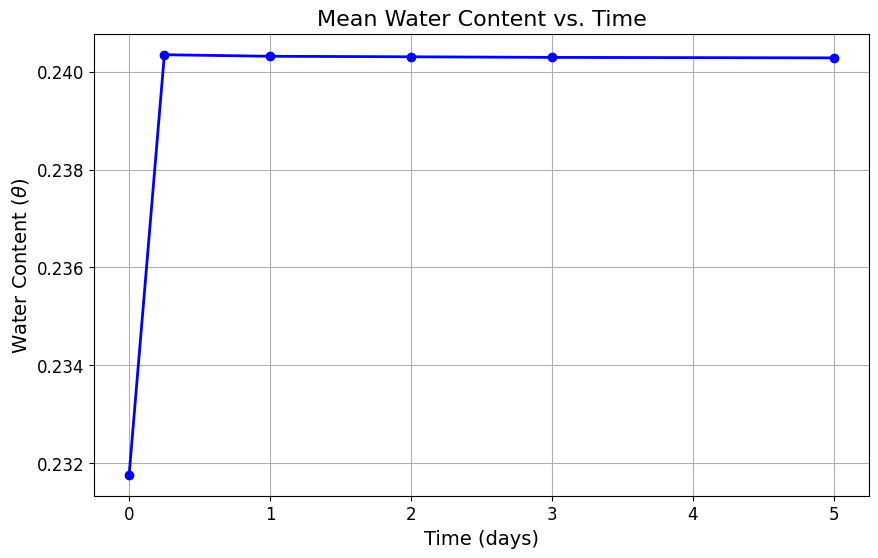

In [8]:
def plot_mean_moisture_over_time(nod_inf_excel):
    """
    Function to calculate the mean Moisture for each time sheet and plot the mean Moisture over time.
    
    Parameters:
    nod_inf_excel (str): Path to the Nod_Inf_output Excel file.
    """
    # Define the sheet names corresponding to each time
    sheet_names = ['Time_0.0000', 'Time_0.2500', 'Time_1.0000', 'Time_2.0000', 'Time_3.0000', 'Time_5.0000']
    
    # Corresponding times
    times = [0, 0.25, 1, 2, 3, 5]
    
    # List to store the mean moisture values
    mean_moistures = []
    
    # Loop through each sheet, calculate the mean moisture, and store it
    for sheet in sheet_names:
        # Read the sheet
        nod_inf_df = pd.read_excel(nod_inf_excel, sheet_name=sheet)
        
        # Convert 'Depth' and 'Moisture' to numeric (if necessary)
        nod_inf_df['Moisture'] = pd.to_numeric(nod_inf_df['Moisture'], errors='coerce')
        nod_inf_df['Depth'] = pd.to_numeric(nod_inf_df['Depth'], errors='coerce')
        
        # Calculate the mean Moisture and append it to the list
        mean_moisture = nod_inf_df['Moisture'].mean()
        mean_moistures.append(mean_moisture)
    
    # Plot the mean Moisture over time
    plt.figure(figsize=(10, 6))
    plt.plot(times, mean_moistures, marker='o', linestyle='-', color='b', linewidth=2.0)

    # Add labels and title
    plt.xlabel('Time (days)', fontsize=14)
    plt.ylabel(r'Water Content ($\theta$)', fontsize=14)
    plt.title('Mean Water Content vs. Time', fontsize=16)
    
    # Set font size for ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Show grid
    plt.grid(True)

    # Show the plot
    plt.show()

# Example usage:
nod_inf_excel = 'C:/Users/marzi/OneDrive - University of New Mexico/CE 549/Homework/HW 10/Nod_Inf_output_P4.xlsx'  # Replace with your actual file path
plot_mean_moisture_over_time(nod_inf_excel)


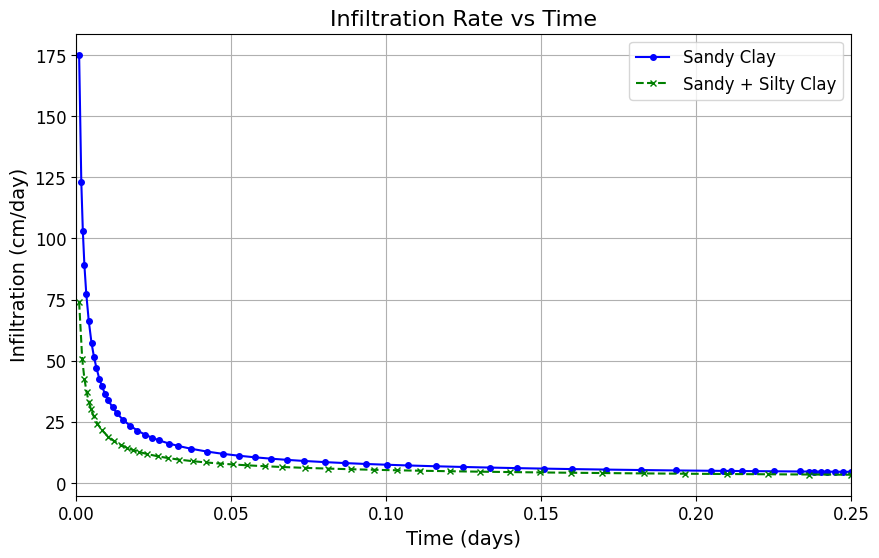

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Function to read two Excel files and plot (sum_Infil / Time) vs Time with axis range and font size settings
def plot_infil_divided_by_time_vs_time(file_path_1, file_path_2, time_min=0.0010, time_max=0.2500, x_range=None, y_range=None):
    """
    Plots the infiltration rate divided by time against time for two datasets.

    Parameters:
    - file_path_1 (str): Path to the first Excel file.
    - file_path_2 (str): Path to the second Excel file.
    - time_min (float): Minimum time for filtering.
    - time_max (float): Maximum time for filtering.
    - x_range (tuple): Optional range for x-axis (min, max).
    - y_range (tuple): Optional range for y-axis (min, max).
    """
    # Check if the files exist
    for file_path in [file_path_1, file_path_2]:
        if not os.path.exists(file_path):
            print(f"Error: The file {file_path} does not exist.")
            return

    # Function to read and filter data from a given file
    def read_and_filter(file_path):
        df = pd.read_excel(file_path)

        # Check if necessary columns are present
        if 'Time' not in df.columns or 'sum_Infil' not in df.columns:
            print("Error: Required columns ('Time', 'sum_Infil') not found in the Excel file.")
            return None

        # Convert 'Time' column to numeric (in case it's stored as string)
        df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

        # Filter data for the given range in the 'Time' column
        filtered_df = df[(df['Time'] >= time_min) & (df['Time'] <= time_max)]

        # Avoid division by zero
        filtered_df = filtered_df[filtered_df['Time'] != 0]

        # Calculate sum_Infil / Time
        filtered_df['Infil_per_Time'] = filtered_df['sum_Infil'].astype(float) / filtered_df['Time'].astype(float)

        return filtered_df

    # Read and filter data from both files
    filtered_df_1 = read_and_filter(file_path_1)
    filtered_df_2 = read_and_filter(file_path_2)

    # Check if either DataFrame is None
    if filtered_df_1 is None or filtered_df_2 is None:
        return

    # Plot 'Infil_per_Time' vs 'Time' for both datasets
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_df_1['Time'], filtered_df_1['Infil_per_Time'], marker='o', markersize=4, linestyle='-', color='b', label='Sandy Clay')
    plt.plot(filtered_df_2['Time'], filtered_df_2['Infil_per_Time'], marker='x', markersize=4, linestyle='--', color='g', label='Sandy + Silty Clay')

    # Set x-axis and y-axis ranges if provided
    if x_range:
        plt.xlim(x_range)
    if y_range:
        plt.ylim(y_range)

    # Add labels and title with font size
    plt.xlabel('Time (days)', fontsize=14)
    plt.ylabel('Infiltration (cm/day)', fontsize=14)
    plt.title('Infiltration Rate vs Time', fontsize=16)
    plt.legend(fontsize=12)  # Add a legend to distinguish the datasets

    # Set font size for ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Show grid
    plt.grid(True)

    # Show the plot
    plt.show()

# Example usage
file_path_1 = 'C:/Users/marzi/OneDrive - University of New Mexico/CE 549/Homework/HW 10/T_Level_output.xlsx'
file_path_2 = 'C:/Users/marzi/OneDrive - University of New Mexico/CE 549/Homework/HW 10/T_Level_output_P4.xlsx'
x_axis_range = (0.0000, 0.2500)  # X-axis range
y_axis_range = None  # Y-axis range (set to None if you want to auto-scale)

plot_infil_divided_by_time_vs_time(file_path_1, file_path_2, x_range=x_axis_range, y_range=y_axis_range)


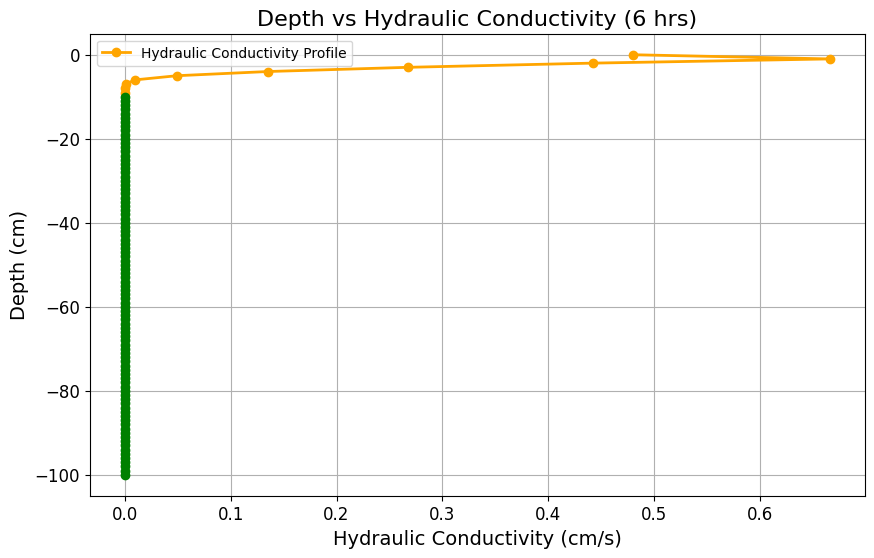

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_depth_vs_hydraulic_conductivity(nod_inf_excel, line_width=2.0):
    """
    Function to plot Depth vs Hydraulic Conductivity from the 'Time_0.2500' sheet in the Nod_Inf_output Excel file,
    and change the line color from green to orange between y=0 and y=-10.
    
    Parameters:
    nod_inf_excel (str): Path to the Nod_Inf_output Excel file.
    line_width (float): Line width for the plot (default is 2.0).
    """
    try:
        # Read the 'Time_0.2500' sheet from the Nod_Inf Excel file
        nod_inf_df = pd.read_excel(nod_inf_excel, sheet_name='Time_0.2500')

        # Convert the 'Depth' and 'Hydraulic Conductivity' columns to numeric (in case they're stored as strings)
        nod_inf_df['Depth'] = pd.to_numeric(nod_inf_df['Depth'], errors='coerce')
        nod_inf_df['Hydraulic Conductivity'] = pd.to_numeric(nod_inf_df['K'], errors='coerce')  # Assuming column K is labeled 'K'

        # Drop rows with NaN values in either Depth or Hydraulic Conductivity columns
        nod_inf_df.dropna(subset=['Depth', 'Hydraulic Conductivity'], inplace=True)

        # Create the plot
        plt.figure(figsize=(10, 6))

        # Segment 1: Plot for Depth > -10 (default green color)
        mask1 = nod_inf_df['Depth'] > -10
        plt.plot(nod_inf_df['Hydraulic Conductivity'][mask1], nod_inf_df['Depth'][mask1], 
                 marker='o', linestyle='-', color='orange', linewidth=line_width, label='Hydraulic Conductivity Profile')

        # Segment 2: Plot for Depth <= -10 (orange color)
        mask2 = nod_inf_df['Depth'] <= -10
        plt.plot(nod_inf_df['Hydraulic Conductivity'][mask2], nod_inf_df['Depth'][mask2], 
                 marker='o', linestyle='-', color='g', linewidth=line_width)

        # Add labels and title
        plt.xlabel('Hydraulic Conductivity (cm/s)', fontsize=14)
        plt.ylabel('Depth (cm)', fontsize=14)
        plt.title('Depth vs Hydraulic Conductivity (6 hrs)', fontsize=16)
        plt.legend()  # Add a legend

        # Set font size for ticks
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        # Show grid
        plt.grid(True)

        # Show the plot
        plt.show()
        
    except FileNotFoundError:
        print(f"Error: The file '{nod_inf_excel}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
nod_inf_excel = 'C:/Users/marzi/OneDrive - University of New Mexico/CE 549/Homework/HW 10/Nod_Inf_output_P4.xlsx'  # Replace with your actual file path
plot_depth_vs_hydraulic_conductivity(nod_inf_excel)  # Adjust the line width as needed


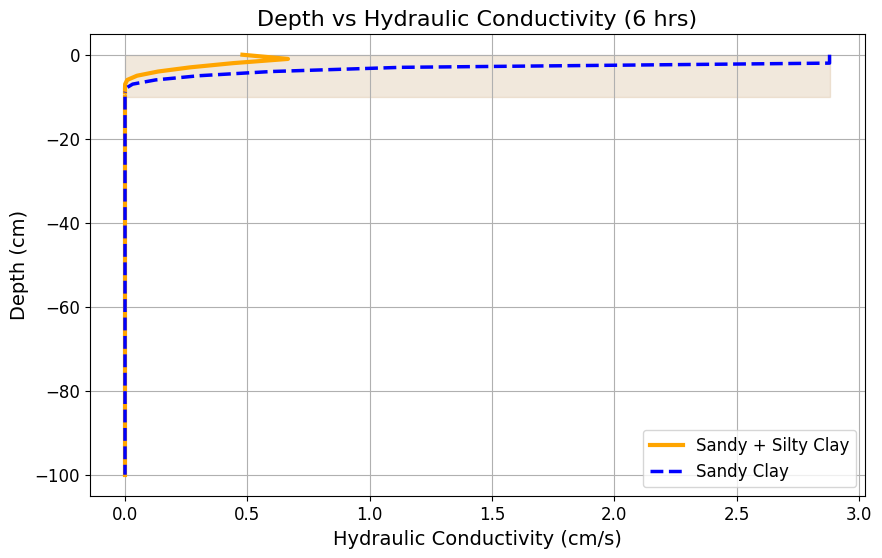

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_depth_vs_hydraulic_conductivity(nod_inf_excel1, nod_inf_excel2, line_width=2.5):
    """
    Function to plot Depth vs Hydraulic Conductivity from two Nod_Inf_output Excel files,
    and change the line color from green to orange between y=0 and y=-10.
    
    Parameters:
    nod_inf_excel1 (str): Path to the first Nod_Inf_output Excel file.
    nod_inf_excel2 (str): Path to the second Nod_Inf_output Excel file.
    line_width (float): Line width for the plot (default is 2.0).
    """
    try:
        # Read the 'Time_0.2500' sheet from both Nod_Inf Excel files
        nod_inf_df1 = pd.read_excel(nod_inf_excel1, sheet_name='Time_0.2500')
        nod_inf_df2 = pd.read_excel(nod_inf_excel2, sheet_name='Time_0.2500')

        # Convert the 'Depth' and 'Hydraulic Conductivity' columns to numeric (in case they're stored as strings)
        nod_inf_df1['Depth'] = pd.to_numeric(nod_inf_df1['Depth'], errors='coerce')
        nod_inf_df1['Hydraulic Conductivity'] = pd.to_numeric(nod_inf_df1['K'], errors='coerce')  # Assuming column K is labeled 'K'

        nod_inf_df2['Depth'] = pd.to_numeric(nod_inf_df2['Depth'], errors='coerce')
        nod_inf_df2['Hydraulic Conductivity'] = pd.to_numeric(nod_inf_df2['K'], errors='coerce')  # Assuming column K is labeled 'K'

        # Drop rows with NaN values in either Depth or Hydraulic Conductivity columns for both dataframes
        nod_inf_df1.dropna(subset=['Depth', 'Hydraulic Conductivity'], inplace=True)
        nod_inf_df2.dropna(subset=['Depth', 'Hydraulic Conductivity'], inplace=True)

        # Create the plot
        plt.figure(figsize=(10, 6))

        # Plot for the first dataset
        # Segment 1: Plot for Depth > -10 (default green color)
        mask1_1 = nod_inf_df1['Depth'] > -10
        plt.plot(nod_inf_df1['Hydraulic Conductivity'][mask1_1], nod_inf_df1['Depth'][mask1_1], 
                 linestyle='-', color='orange', linewidth=3, label='Sandy + Silty Clay')

        # Segment 2: Plot for Depth <= -10 (orange color)
        mask1_2 = nod_inf_df1['Depth'] <= -10
        plt.plot(nod_inf_df1['Hydraulic Conductivity'][mask1_2], nod_inf_df1['Depth'][mask1_2], 
                 linestyle='-', color='orange', linewidth=3)

        # Plot for the second dataset
        # Segment 1: Plot for Depth > -10 (default green color)
        mask2_1 = nod_inf_df2['Depth'] > -10
        plt.plot(nod_inf_df2['Hydraulic Conductivity'][mask2_1], nod_inf_df2['Depth'][mask2_1], 
                 linestyle='--', color='b', linewidth=line_width, label='Sandy Clay')

        # Segment 2: Plot for Depth <= -10 (orange color)
        mask2_2 = nod_inf_df2['Depth'] <= -10
        plt.plot(nod_inf_df2['Hydraulic Conductivity'][mask2_2], nod_inf_df2['Depth'][mask2_2], 
                 linestyle='--', color='b', linewidth=line_width)
        
        # Add a transparent tan box between y=0 and y=-10
        plt.fill_betweenx(y=[-10, 0], x1=min(nod_inf_df1['Hydraulic Conductivity'].min(), nod_inf_df2['Hydraulic Conductivity'].min()),
                          x2=max(nod_inf_df1['Hydraulic Conductivity'].max(), nod_inf_df2['Hydraulic Conductivity'].max()),
                          color='tan', alpha=0.3)

        # Add labels and title
        plt.xlabel('Hydraulic Conductivity (cm/s)', fontsize=14)
        plt.ylabel('Depth (cm)', fontsize=14)
        plt.title('Depth vs Hydraulic Conductivity (6 hrs)', fontsize=16)
        plt.legend(fontsize=12)  # Add a legend

        # Set font size for ticks
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

        # Show grid
        plt.grid(True)

        # Show the plot
        plt.show()
        
    except FileNotFoundError:
        print(f"Error: One of the files '{nod_inf_excel1}' or '{nod_inf_excel2}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
nod_inf_excel1 = 'C:/Users/marzi/OneDrive - University of New Mexico/CE 549/Homework/HW 10/Nod_Inf_output_P4.xlsx'  # Replace with your actual file path
nod_inf_excel2 = 'C:/Users/marzi/OneDrive - University of New Mexico/CE 549/Homework/HW 10/Nod_Inf_output.xlsx'  # Replace with your second file path
plot_depth_vs_hydraulic_conductivity(nod_inf_excel1, nod_inf_excel2)  # Adjust the line width as needed
